# 

# Analysis of bike sharing on Edinburgh from Just Eat Cycles

Hi, welcome to my analysis of edinburgh's bike sharing from Just Eat Cycles. 

I will work with two datasets: edinburgh_bikes and edinburgh_weather
and i will try to get answers for this questions:

1) Identify active and unactive stations

2) Identify of the most frequently stations

3) Identify difference between rented and returned of bikes on stations

4) Calculate distances between particular stations

5) What is the usual duration of bike rent?

6) Development of demand for bicycle rental over time

7) Identify the causes of demand fluctuations

8) Influence of weather on demand

9) Demand for bike lending by the days of week and  the months

So, let' s get started.

# Importing the libraries

In [688]:
import pandas as pd
import numpy as np
import sqlalchemy
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Loading the datasets from csv files

In [689]:
edinburgh_bikes_df = pd.read_csv('edinburgh_bikes.csv', index_col=[0])
edinburgh_weather_df = pd.read_csv('edinburgh_weather.csv', index_col=[0])

# The first looks on edinburg_bikes dataset 

In [690]:
edinburgh_bikes_df

,index,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,0,2018-09-15 08:52:05,2018-09-15 09:11:48,1182,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,259,St Andrew Square,North East corner,55.954728,-3.192653
1,1,2018-09-15 09:24:33,2018-09-15 09:41:09,995,259,St Andrew Square,North East corner,55.954749,-3.192774,262,Canonmills,near Tesco's,55.962804,-3.196284
2,2,2018-09-15 09:48:54,2018-09-15 10:46:40,3466,262,Canonmills,near Tesco's,55.962804,-3.196284,250,Victoria Quay,Entrance to Scottish Government Office,55.977638,-3.174116
3,3,2018-09-16 12:01:36,2018-09-16 12:25:26,1430,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,254,Kings Building 3,Kings Building House,55.923479,-3.175385
4,4,2018-09-16 12:03:43,2018-09-16 12:11:16,452,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,253,Kings Building 2,Sanderson Building,55.923202,-3.171646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438254,12636,2021-06-30 23:30:31,2021-07-01 00:06:10,2139,1090,Hillside Crescent,East end of Hillside Crescent,55.957872,-3.175888,1728,Portobello - Kings Road,Foot of Kings Road next to the promenade,55.957915,-3.118332
438255,12637,2021-06-30 23:36:16,2021-07-01 00:05:40,1763,1814,Abbeyhill,Near Abbey Mount,55.955248,-3.172216,1728,Portobello - Kings Road,Foot of Kings Road next to the promenade,55.957915,-3.118332
438256,12638,2021-06-30 23:49:03,2021-07-01 00:11:25,1342,256,St Andrews House,beside Jacobs ladder,55.953164,-3.181682,1091,Holyrood Road,Opposite St Leonards Land,55.949560,-3.180413
438257,12639,2021-06-30 23:49:03,2021-07-01 00:11:52,1369,256,St Andrews House,beside Jacobs ladder,55.953164,-3.181682,1091,Holyrood Road,Opposite St Leonards Land,55.949560,-3.180413


Now i using .info() method for finding a useful informations about the DataFrame. 

In [691]:
edinburgh_bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438259 entries, 0 to 438258
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      438259 non-null  int64  
 1   started_at                 438259 non-null  object 
 2   ended_at                   438259 non-null  object 
 3   duration                   438259 non-null  int64  
 4   start_station_id           438259 non-null  int64  
 5   start_station_name         438259 non-null  object 
 6   start_station_description  434118 non-null  object 
 7   start_station_latitude     438259 non-null  float64
 8   start_station_longitude    438259 non-null  float64
 9   end_station_id             438259 non-null  int64  
 10  end_station_name           438259 non-null  object 
 11  end_station_description    433570 non-null  object 
 12  end_station_latitude       438259 non-null  float64
 13  end_station_longitude      43

Finding how many null values are in each columns.

In [692]:
edinburgh_bikes_df.isna().sum()

index                           0
started_at                      0
ended_at                        0
duration                        0
start_station_id                0
start_station_name              0
start_station_description    4141
start_station_latitude          0
start_station_longitude         0
end_station_id                  0
end_station_name                0
end_station_description      4689
end_station_latitude            0
end_station_longitude           0
dtype: int64

Null values are locate in two columns, start_station_description and end_station_description. This columns is not important for analysis so we can change null values on 'Unknown' and keep all of rows from DataFrame.

In [693]:
edinburgh_bikes_df = edinburgh_bikes_df.fillna('Unknown')
edinburgh_bikes_df.isna().sum()

index                        0
started_at                   0
ended_at                     0
duration                     0
start_station_id             0
start_station_name           0
start_station_description    0
start_station_latitude       0
start_station_longitude      0
end_station_id               0
end_station_name             0
end_station_description      0
end_station_latitude         0
end_station_longitude        0
dtype: int64

# Preparing data for another work

For getting answer for next four questions need data about all of stations ( start_station and end_station) in one column.

When i worked with data i find how work station_id. So station_id is different for every geographic coordinates, but if some station changed name, station_id stayed same. So i had to group stations by station_id and select the newest name station.

After grouping all stations by station_id i getting a 200 stations.

For this stations i get informations about  date_of_last_used, started_sum, ended_sum, total_sum, diff (between started and ended summ), station_latitude and station_longitude.

In [694]:
edinburgh_bikes_df['date'] = pd.to_datetime(edinburgh_bikes_df['started_at']).dt.date

df1 = (edinburgh_bikes_df
       .groupby(['start_station_id','started_at'])
       ['duration'].count()
       .reset_index()
      )
df1 = (df1
       .groupby(['start_station_id'])
       [['started_at','duration']].agg({'started_at':'max','duration':'count'})
       .reset_index()
       .replace(np.nan, dt.date(1900, 1, 1))
      )
df1 = (pd.merge(
        df1,edinburgh_bikes_df,how='left', on=('start_station_id','started_at'))
       .rename(columns={'duration_x':'duration'}
               ))
df1 = (df1[['start_station_id','date','duration','start_station_name','start_station_latitude','start_station_longitude']]
       .rename(columns={'start_station_id':'station_id'})
      )

df2 = (edinburgh_bikes_df
       .groupby(['end_station_id','ended_at'])
       ['duration'].sum()
       .reset_index()
      )
df2 = (df2
       .groupby(['end_station_id'])
       [['ended_at','duration']].agg({'ended_at':'max','duration':'count'})
       .reset_index()
       .replace(np.nan, dt.date(1900, 1, 1))
      )
df2 = (pd.merge(
        df2,edinburgh_bikes_df,how='left', on=('end_station_id','ended_at'))
        .rename(columns={'duration_x':'duration'}
               ))
df2 = (df2[['end_station_id','date','duration','end_station_name','end_station_latitude','end_station_longitude']]
       .rename(columns={'end_station_id':'station_id'})
      )

df3 = pd.merge(df1,df2,how='outer', on=('station_id','date'))
df3['rank'] = df3.groupby('station_id')['date'].rank(ascending=False)
df3 = df3.query('rank < 2').drop_duplicates()

df3['station_name'] = np.where(pd.isnull(df3['start_station_name']),
                                         df3['end_station_name'],
                                         df3['start_station_name'])
df3['station_latitude'] = np.where(pd.isnull(df3['start_station_latitude']),
                                             df3['end_station_latitude'],
                                             df3['start_station_latitude'])
df3['station_longitude'] = np.where(pd.isnull(df3['start_station_longitude']),
                                              df3['end_station_longitude'],
                                              df3['start_station_longitude'])

df3.drop(['start_station_name','start_station_latitude','start_station_longitude',
          'end_station_name','end_station_latitude','end_station_longitude','rank'],
         axis=1, inplace=True)

df3 = df3.fillna(0).rename(columns={'duration_x':'started_sum',
                                    'duration_y':'ended_sum',
                                    'date':'date_of_last_used'
                                   })

df3['total_sum'] = df3['started_sum'] + df3['ended_sum']
df3['diff'] = df3['ended_sum'] - df3['started_sum']

list_of_station = df3[['station_id','station_name','date_of_last_used','started_sum',
                       'ended_sum','total_sum','diff','station_latitude','station_longitude']]

list_of_station
       


,station_id,station_name,date_of_last_used,started_sum,ended_sum,total_sum,diff,station_latitude,station_longitude
0,171,George Square,2021-06-30,6059.0,6117.0,12176.0,58.0,55.943084,-3.188311
1,183,Waverley Bridge,2021-06-30,8482.0,8324.0,16806.0,-158.0,55.951981,-3.191890
2,189,City Chambers,2021-06-30,5804.0,2693.0,8497.0,-3111.0,55.950109,-3.190258
3,225,Waverley Court,2021-06-29,2519.0,2351.0,4870.0,-168.0,55.951734,-3.184179
4,241,Depot,2018-09-27,2.0,3.0,5.0,1.0,55.972373,-3.155833
...,...,...,...,...,...,...,...,...,...
248,1859,Edinburgh Park Central,2020-12-08,0.0,235.0,235.0,235.0,55.931169,-3.314414
249,1860,Ingliston Park & Ride,2021-04-21,0.0,221.0,221.0,221.0,55.938792,-3.355556
250,1864,Borrowman Square,2021-03-18,0.0,546.0,546.0,546.0,55.982606,-3.381455
252,1869,Hopetoun Road,2021-04-26,0.0,1080.0,1080.0,1080.0,55.990182,-3.404604


# 1) Identify active and unactive stations

For identify active and unactive stations i will use DataFrame called list_of_station.

I am decided for splitting stations on active and unactive station by date of last used. 

Active stations are station which was use at least once of the last month. Other stations are unactive.

In [695]:
df1 = list_of_station

df1 = df1.assign(year = pd.DatetimeIndex(df1['date_of_last_used']).year,
           month = pd.DatetimeIndex(df1['date_of_last_used']).month)

df1['activity'] = np.where((df1['year'] > 2020) & (df1['month'] > 5), 'yes', 'no')
active_station = df1.query('activity == "yes"')
unactive_station = df1.query('activity == "no"')

Now i creating a new DataFrame with two clomuns (active_stations and unactive_stations). DataFrame will called activity_of_station.

In [696]:
active = active_station['station_name'].array
unactive = unactive_station['station_name'].array

a = {'active_station':active, 'unactive_station':unactive}
activity_of_station = pd.DataFrame.from_dict(a, orient='index')
activity_of_station = activity_of_station.transpose()

print(f'Number of active stations: {active.shape[0]}')
print(f'Number of unactive stations: {unactive.shape[0]}')
activity_of_station

Number of active stations: 88
Number of unactive stations: 112


,active_station,unactive_station
0,George Square,Depot
1,Waverley Bridge,Kings Buildings 4
2,City Chambers,Brunswick Place - Virtual
3,Waverley Court,Launch Day Event
4,Royal Commonwealth Pool,Shrubhill
...,...,...
107,None,Edinburgh Park Central
108,None,Ingliston Park & Ride
109,None,Borrowman Square
110,None,Hopetoun Road


# Map of stations

On the map of the stations we can see positions of all the stations. Blue points display an active stations and red points display an unactive station. Size of points derives from a count of bike rent.

In [697]:
fig = px.scatter_mapbox(df1,lat='station_latitude',hover_name='station_name', lon='station_longitude',color="activity",size="total_sum",size_max=15, zoom=10, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# 2) Identify of the most frequently stations

For the identify the most frequently stations i will use DataFrame called active_station. This DataFrame i am going to descending sort by total_sum and i will display first 30 rows.

In [698]:
df1 = active_station[['station_name','total_sum']].set_index('station_name')
the_most_frequenty_station = df1.sort_values(by=['total_sum'], ascending=False).head(30)
the_most_frequenty_station

,total_sum
station_name,
Meadows East,32447.0
Portobello - Kings Road,28327.0
Victoria Quay,25754.0
Canonmills,21350.0
Bristo Square,20597.0
St Andrew Square,20445.0
Meadow Place,20078.0
Leith Walk,18859.0
Duke Street,18442.0


In the next step i am displaying horizontal bar chart of the most frequently stations.

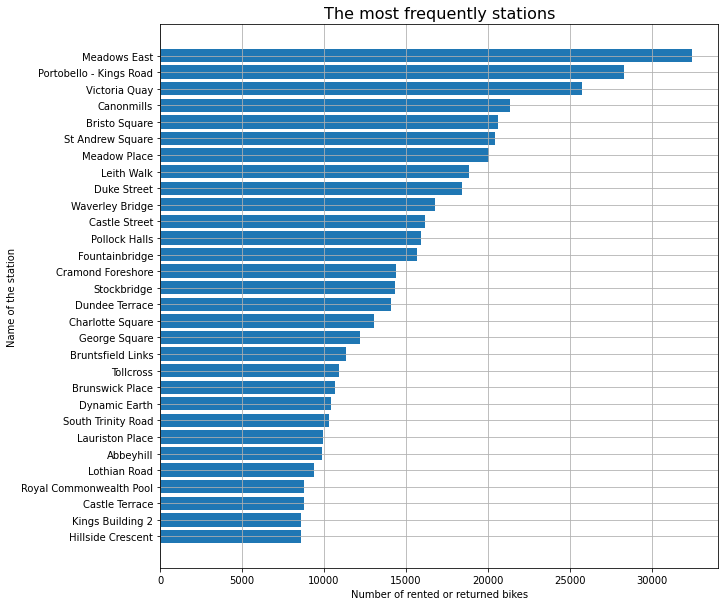

In [699]:
x = the_most_frequenty_station.sort_values(by=['total_sum']).reset_index()['station_name']
y = the_most_frequenty_station.sort_values(by=['total_sum'])['total_sum']

fig = plt.figure(figsize=(10, 10))
  
plt.barh(x, y)
plt.xlabel('Number of rented or returned bikes')
plt.ylabel('Name of the station')
plt.title('The most frequently stations', fontsize = 16)
plt.grid()
plt.show()

# 3) Identify difference between rented and returned of bikes on stations

Difference between rented and returned of bikes in stations is located in column called diff in created DataFrame called active_station. Column diff i count by formula (returned bikes - rented bikes = diff), so if diff is more then 0, bikes are acumulating in the station and if diff is less then 0, bikes are missing in the station.

In [700]:
df1 = active_station[['station_name','diff']].set_index('station_name')
df1.sort_values(by=['diff'])

,diff
station_name,
Bristo Square,-4939.0
St Andrew Square,-3865.0
Charlotte Square,-3150.0
City Chambers,-3111.0
Marchmont Crescent,-3073.0
...,...
Waitrose Comely Bank,2856.0
Leith Walk,3003.0
Duke Street,3948.0


Now i will display stations in the horizontal bar chart, which have diff more then 500 or less then -500. Stations with positive diff will have blue color and stations with negative diff will have red color.

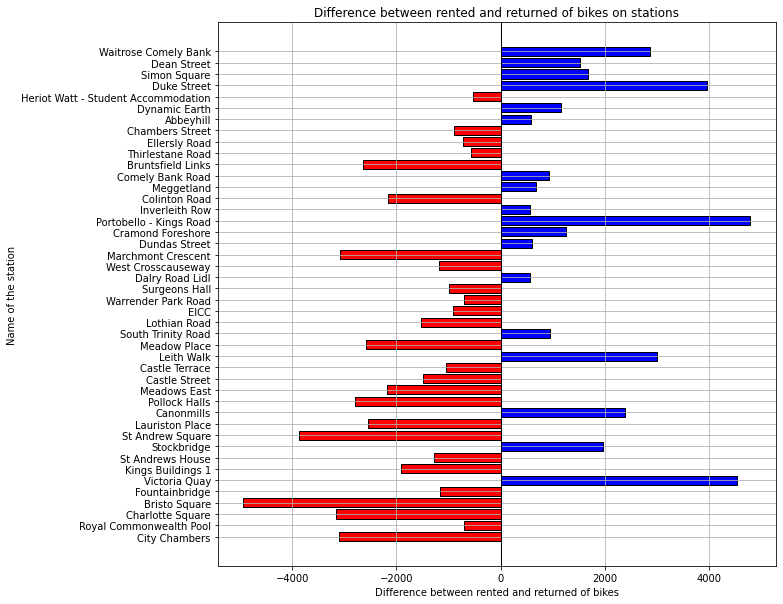

In [701]:
def bar_color(y,color1,color2):
    return np.where(y>0,color1,color2)

x = df1[(df1['diff'] > 500) | (df1['diff'] < -500)].reset_index()['station_name']
y = df1[(df1['diff'] > 500) | (df1['diff'] < -500)]['diff']

fig = plt.figure(figsize=(10, 10))
  
plt.barh(x, y, color = bar_color(y,'b','r'), edgecolor = 'black')
plt.xlabel('Difference between rented and returned of bikes')
plt.ylabel('Name of the station')
plt.title('Difference between rented and returned of bikes on stations')
plt.axvline(0, color='k', linewidth=1)
plt.grid()
plt.show()



The most of missing bikes are in the Bristo Square station and the most of accumulating bikes are in the Portobello - Kings Road station.

# 4) Calculate distances between particular stations

For calculating distance between stations i  made function which allow calculating distance through geographic coordinates.

In [702]:
def Distance(latitude1, latitude2, longitude1, longitude2):

    R = 6371
    
    lat1 = np.radians(latitude1)
    lat2 = np.radians(latitude2)
    
    long1 = np.radians(longitude1)
    long2 = np.radians(longitude2)
    
    lat_diff = lat1 - lat2
    long_diff = long1 - long2
    
    a = np.sin(lat_diff / 2)**2 + np.sin(long_diff / 2)**2 * np.cos(lat1) * np.cos(lat2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    d = R * c

    return d

To calculate the distances between the individual stations i will have to use a cross merge between two identical DataFrrames called list_of_station to create a new DataFrame for next work.

In the next step i will use my distance function in 'for loap' for calculating distance between all stations.

In [703]:
df1 = list_of_station[['station_name','station_latitude','station_longitude']]
df2 = pd.merge(df1,df1,how='cross')

df2['distance'] = 0
for i in range(df2.index.size):
    df2.iloc[i,6] = Distance(df2.iloc[i,1],df2.iloc[i,4],df2.iloc[i,2],df2.iloc[i,5])


Now i using .describe() function for find out descriptive statistics about calculated distances. Calculated distance is in km.


In [704]:
df2['distance'].describe()

count    40000.000000
mean         7.603254
std         28.010556
min          0.000000
25%          2.017925
50%          3.552411
75%          6.952364
max        290.060418
Name: distance, dtype: float64

We can see the min value is 0. It is becuase some distances was calculeted between identical stations. So i will drop rows, where are distance is 0. But we can also see that max distance is  290 km and it means then some stations are far from Edinburh.

Now i will display box plot for identify outliers.

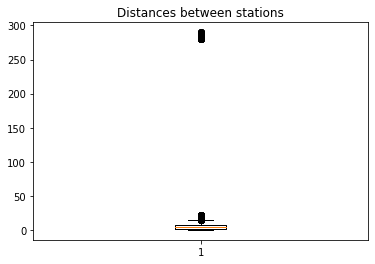

In [705]:
fig, ax = plt.subplots()
ax.boxplot(df2['distance'])
ax.set_title('Distances between stations')
plt.show()

From this box plot i can see that outliers are locate more then 250 km. So now i will set conditions for distances. Distance must be more then 0 and less then 250 km.

In [706]:
df3 = df2[(df2['distance'] > 0) & (df2['distance'] < 250)]

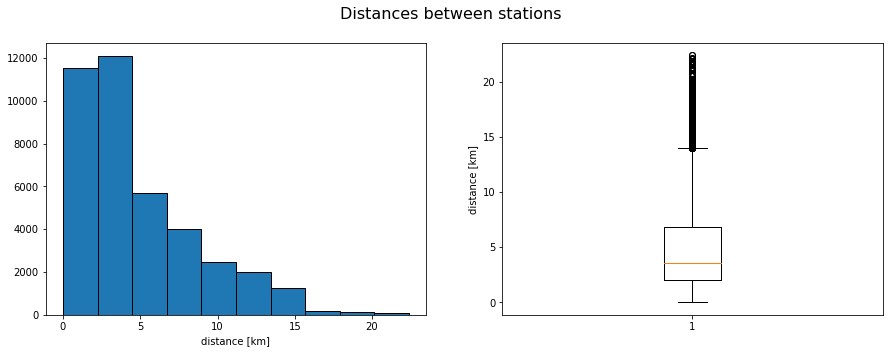

count    39402.000000
mean         4.845977
std          3.830956
min          0.000375
25%          2.023157
50%          3.531953
75%          6.820408
max         22.382130
Name: distance, dtype: float64


In [707]:
fig = plt.figure(figsize=(15,5))
fig.suptitle('Distances between stations', fontsize=16)

ax1 = plt.subplot2grid((1,2), (0,0), fig=fig)
ax1.hist(df3['distance'], edgecolor='black')
ax1.set_xlabel('distance [km]')

ax2 = plt.subplot2grid((1,2), (0,1), fig=fig)
ax2.boxplot(df3['distance'])
ax2.set_ylabel('distance [km]')

plt.show()

print(df3['distance'].describe())


# 5) What is the usual duration of bike rent?

In the first step i will transform duration from the seconds to the minutes.

In [708]:
df = edinburgh_bikes_df
df['duration'] = df['duration'].transform(lambda x: x/60)

Now i using .describe() function for find out descriptive statistics about duration.

In [709]:
df['duration'].describe()

count    438259.000000
mean         32.480634
std          94.285580
min           1.016667
25%          10.400000
50%          19.383333
75%          42.150000
max       39389.133333
Name: duration, dtype: float64

From this descriptive statistics i can see a very huge difference between 75% quartile and max value. It can means then couple of values are far from others. 
Now i will  display boxplot with max value set on 99% quantile.

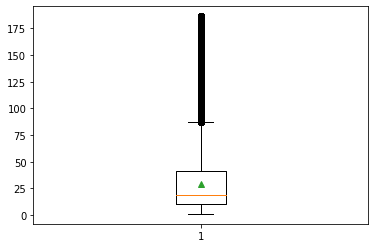

count    433876.000000
mean         29.335606
std          27.767296
min           1.016667
25%          10.333333
50%          19.133333
75%          41.166667
max         186.466667
Name: duration, dtype: float64


In [710]:
q = df['duration'].quantile(0.99)
df1 = df[df['duration'] < q]
plt.boxplot(df1['duration'], showmeans=True)
plt.show()

print(df1['duration'].describe())

Now descriptive statistics looks better. So let's start to display histogram.

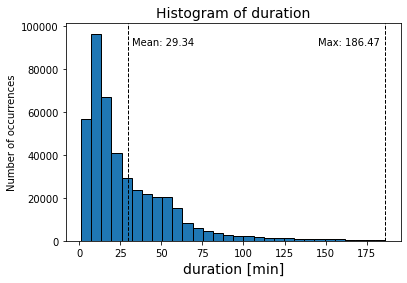

In [711]:
plt.hist(df1['duration'], bins=30, edgecolor='black')
plt.title('Histogram of duration', fontsize='14')
plt.xlabel('duration [min]',fontsize=14)
plt.ylabel('Number of occurrences')
plt.axvline(df1['duration'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df1['duration'].max(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df1['duration'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df1['duration'].mean()))
plt.text(df1['duration'].max()*0.78, max_ylim*0.9, 'Max: {:.2f}'.format(df1['duration'].max()))
plt.show()

# 6) Development of demand for bicycle rental over time 

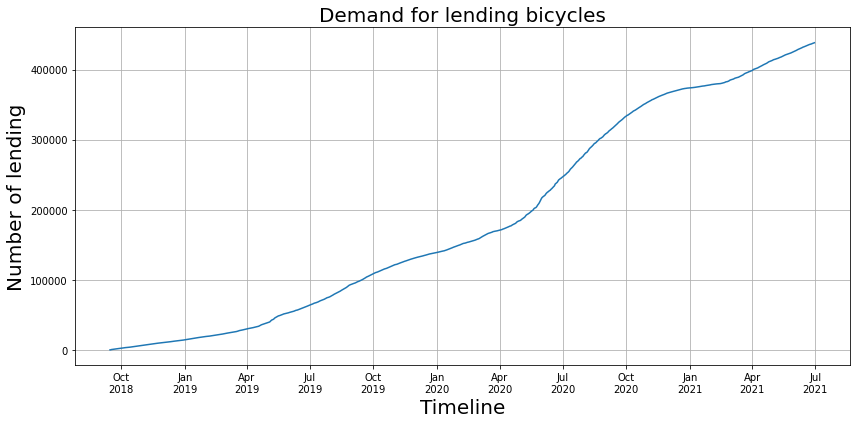

In [712]:
df1 = edinburgh_bikes_df[['date','duration']].groupby('date')['duration'].count().reset_index().set_index('date')
df1 = df1.cumsum().reset_index()

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df1['date'],df1['duration'])
ax.set_title('Demand for lending bicycles', fontsize=20)
ax.set_xlabel('Timeline', fontsize=20)
ax.set_ylabel('Number of lending', fontsize=20)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax.grid()
plt.tight_layout()
plt.show()

# 7) Identify the causes of demand fluctuations

I will try to find causes of demand fluctuation during day, week and year. For this i will need to preparing another four columns (year, month, day_of_week and time). 

In [713]:
edinburgh_bikes_df['year'] = pd.to_datetime(edinburgh_bikes_df['date']).dt.year
edinburgh_bikes_df['month'] = pd.to_datetime(edinburgh_bikes_df['date']).dt.month
edinburgh_bikes_df['day_of_week'] = pd.to_datetime(edinburgh_bikes_df['date']).dt.dayofweek
edinburgh_bikes_df['time'] = pd.to_datetime(edinburgh_bikes_df['started_at']).dt.strftime('%H').apply(int)

When i have prepared data i can create four DataFrames for creating line charts.

df_work_day - for this DataFrame i counted average demand for each hour in work day.

df_weekend_day - for this DataFrame i counted average demand for each hour in weekend day.

df_day_of_week - for this DataFrame i counted average demand for each day in week.

df_month - for this DataFrame i counted average demand for each month of the year.

In [714]:
number_of_days = edinburgh_bikes_df.groupby('date').count().index.size

df_work_day = (edinburgh_bikes_df
               .query('day_of_week < 5')
               [['time','duration']].groupby('time')
               .agg({'duration': lambda x: x.count()/((number_of_days / 7) * 5)})
               .reset_index()
              )
df_weekend_day = (edinburgh_bikes_df
                  .query('day_of_week >= 5')
                  [['time','duration']].groupby('time')
                  .agg({'duration': lambda x: x.count()/((number_of_days / 7) * 2)})
                  .reset_index()
                 )
df_week = (edinburgh_bikes_df
           [['day_of_week','duration']].groupby('day_of_week')
           .agg({'duration': lambda x: x.count()/(number_of_days / 7)})
           .reset_index()
          )
df_month = (edinburgh_bikes_df
            .query('(year > 2018 and year < 2021)')
            [['month','duration']].groupby('month')
            .agg({'duration': lambda x: x.count()/2})
            .reset_index()
           )

Now i can create a line charts.

In the first line chart i will display fluctuation of demand in work and weekend day, where we will can see a difference between them.

In the second line chart i will display fluctuation of demand in days of the week.

In the last of line chart i will display fluctuation of demand in months of the year.

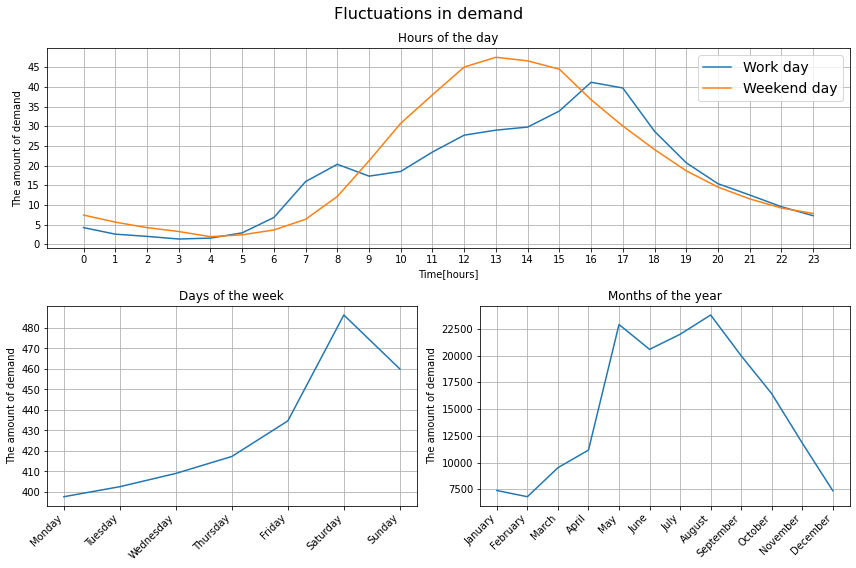

In [715]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig = plt.figure(figsize=(12,8))
fig.suptitle('Fluctuations in demand', fontsize=16)

ax1 = plt.subplot2grid((2,2), (0,0), fig=fig, colspan=2)
ax1.plot(df_work_day['time'],df_work_day['duration'])
ax1.plot(df_weekend_day['time'],df_weekend_day['duration'])
ax1.set_title('Hours of the day')
ax1.set_xlabel('Time[hours]')
ax1.xaxis.set_ticks(np.arange(0, 24, 1))
ax1.yaxis.set_ticks(np.arange(0, 50, 5))
ax1.legend(['Work day', 'Weekend day'],fontsize=14)

ax3 = plt.subplot2grid((2,2), (1,0), fig=fig)
ax3.plot(df_week['day_of_week'],df_week['duration'])
ax3.set_title('Days of the week')
ax3.xaxis.set_ticks(np.arange(0, 7, 1))
ax3.set_xticklabels(days_of_week, rotation=45, ha='right')
ax3.yaxis.set_ticks(np.arange(400, 490, 10))

ax4 = plt.subplot2grid((2,2), (1,1), fig=fig)
ax4.plot(df_month['month'],df_month['duration'])
ax4.set_title('Months of the year')
ax4.xaxis.set_ticks(np.arange(1, 13, 1))
ax4.set_xticklabels(months, rotation=45, ha='right')

for ax in (ax1, ax2, ax3, ax4):
    
    ax.set_ylabel('The amount of demand')
    ax.grid()

plt.tight_layout()
plt.show()


From these graphs it is possible to idenfity fluctuations in demand during the day, week and year.

During the day, demand increases in the morning and begins to decline in the afternoon. In the morning and evening, the demand is higher on a working day, while the forenoon and afternoon demand is lower on a working day. The reason for these differences is probably working hours, when a lot of people are at work.

During the week, the lowest demand is on Monday. But then it gradually growth during the week. The biggest demand is on Saturday.

Demand during the year depends on temperature differences. The biggest demand is in the summer months and the lowest is in the winter months.

# 8) Influence of weather on demand

To determine the effect of weather on demand, it is necessary to use a second dataset called 'edinburgh_weather_df'. First I create new columns in the dataset so that I can merge both datasets into one. I decided to combine datasets by date and time. The dataset 'edinburgh_weather_df' has values recorded after three hours, so I created a new column 'time_interval', which I will then create in the dataset 'edinburgh_bikes_df'.

Next, I had to remove the units in the columns so that I could convert the values to int and continue to work with them.

In [716]:
edinburgh_weather_df['clean_hours'] = (edinburgh_weather_df.time.apply(lambda x: pd.to_datetime(x).strftime('%H'))).apply(int)
edinburgh_weather_df['time_interval'] = pd.cut(edinburgh_weather_df['clean_hours'],[0,3,6,9,12,15,18,21,24],right=False)
edinburgh_weather_df['date'] = pd.to_datetime(edinburgh_weather_df['date']).dt.date
df1 = edinburgh_weather_df.rename(columns={'temp':'temp[°c]',
                                           'feels':'feels[°c]',
                                           'wind':'wind[km/h]',
                                           'gust':'gust[km/h]',
                                           'rain':'rain[mm]',
                                           'humidity':'humidity[%]',
                                           'cloud':'cloud[%]',
                                           'pressure':'pressure[mb]'
                                          })

df1['temp[°c]'] = df1['temp[°c]'].replace('°c','*1',regex=True).apply(pd.eval)
df1['feels[°c]'] = df1['feels[°c]'].replace('°c','*1',regex=True).apply(pd.eval)
df1['wind[km/h]'] = df1['wind[km/h]'].str.split('k').str[0].apply(pd.eval)
df1['gust[km/h]'] = df1['gust[km/h]'].replace('km/h','*1',regex=True).apply(pd.eval)
df1['rain[mm]'] = df1['rain[mm]'].replace('mm','*1',regex=True).apply(pd.eval)
df1['humidity[%]'] = df1['humidity[%]'].replace('%','*1',regex=True).apply(pd.eval)
df1['cloud[%]'] = df1['cloud[%]'].replace('%','*1',regex=True).apply(pd.eval)
df1['pressure[mb]'] = df1['pressure[mb]'].replace('mb','*1',regex=True).apply(pd.eval)

df1.drop(columns=['time','clean_hours'], inplace=True)
df1

,temp[°c],feels[°c],wind[km/h],gust[km/h],rain[mm],humidity[%],cloud[%],pressure[mb],vis,date,time_interval
0,11,11,9,19,0.0,79,13,1020,Excellent,2018-09-01,"[0, 3)"
1,13,12,11,19,0.0,76,96,1020,Excellent,2018-09-01,"[3, 6)"
2,14,13,11,19,0.0,84,100,1020,Excellent,2018-09-01,"[6, 9)"
3,14,13,14,23,0.1,88,78,1021,Excellent,2018-09-01,"[9, 12)"
4,16,16,15,22,0.0,87,87,1021,Excellent,2018-09-01,"[12, 15)"
...,...,...,...,...,...,...,...,...,...,...,...
6331,14,12,21,33,0.4,86,100,993,Poor,2020-10-31,"[9, 12)"
6332,14,12,24,37,0.4,88,94,987,Poor,2020-10-31,"[12, 15)"
6333,10,6,42,55,0.5,75,100,989,Excellent,2020-10-31,"[15, 18)"
6334,9,5,38,54,0.0,76,79,994,Excellent,2020-10-31,"[18, 21)"


Here I created a new column in the dataset 'edinburgh_bikes_df'. I named the column 'time_interval' as in the previous dataset. Then I grouped the dataset through the 'date' and 'time_interval' columns and counted the number of loans for each interval on each day.

In [717]:
edinburgh_bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438259 entries, 0 to 438258
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      438259 non-null  int64  
 1   started_at                 438259 non-null  object 
 2   ended_at                   438259 non-null  object 
 3   duration                   438259 non-null  float64
 4   start_station_id           438259 non-null  int64  
 5   start_station_name         438259 non-null  object 
 6   start_station_description  438259 non-null  object 
 7   start_station_latitude     438259 non-null  float64
 8   start_station_longitude    438259 non-null  float64
 9   end_station_id             438259 non-null  int64  
 10  end_station_name           438259 non-null  object 
 11  end_station_description    438259 non-null  object 
 12  end_station_latitude       438259 non-null  float64
 13  end_station_longitude      43

In [718]:
df2 = edinburgh_bikes_df[['date','time','duration']].groupby(['date','time']).count().reset_index()
df2['time_interval'] = pd.cut(df2['time'],[0,3,6,9,12,15,18,21,24],right=False)
df2 = df2.groupby(['date','time_interval'])['duration'].count().reset_index()
df2

,date,time_interval,duration
0,2018-09-15,"[0, 3)",0
1,2018-09-15,"[3, 6)",0
2,2018-09-15,"[6, 9)",1
3,2018-09-15,"[9, 12)",1
4,2018-09-15,"[12, 15)",0
...,...,...,...
8155,2021-06-30,"[9, 12)",3
8156,2021-06-30,"[12, 15)",3
8157,2021-06-30,"[15, 18)",3
8158,2021-06-30,"[18, 21)",3


Both data sets are prepared and now i can merge them using the .merge () function.

In [719]:
df = pd.merge(df1,df2,how='inner', on=('date','time_interval'))
df

,temp[°c],feels[°c],wind[km/h],gust[km/h],rain[mm],humidity[%],cloud[%],pressure[mb],vis,date,time_interval,duration
0,7,4,14,26,0.0,92,14,1016,Excellent,2018-09-15,"[0, 3)",0
1,7,4,14,27,0.0,92,19,1017,Excellent,2018-09-15,"[3, 6)",0
2,8,6,13,22,0.0,91,100,1018,Excellent,2018-09-15,"[6, 9)",1
3,10,8,16,23,0.0,80,60,1019,Excellent,2018-09-15,"[9, 12)",1
4,14,12,17,21,0.0,65,43,1019,Excellent,2018-09-15,"[12, 15)",0
...,...,...,...,...,...,...,...,...,...,...,...,...
6219,14,12,21,33,0.4,86,100,993,Poor,2020-10-31,"[9, 12)",3
6220,14,12,24,37,0.4,88,94,987,Poor,2020-10-31,"[12, 15)",3
6221,10,6,42,55,0.5,75,100,989,Excellent,2020-10-31,"[15, 18)",3
6222,9,5,38,54,0.0,76,79,994,Excellent,2020-10-31,"[18, 21)",3


Creating a function that creates a new DataFrame for the specified column from the dataset. The new df will have two columns. The column that was entered into the function (eg. temp [° c]) and in the second column will be the average number of lend bikess for each value from the specified column.

In [720]:
def df_by_column(column):
    df_new = (df
              .groupby(['date','time_interval'])
              .agg({'duration':lambda x: x.sum() / 3,column:'mean'})
              .reset_index()
              .groupby(column)
              ['duration'].mean()
              .reset_index()
             )
    return df_new

I will now use the created dataset and function to create charts that will show the effect of each quantity on the demand for wheels. All chartss will be scatter except for the chart showing the effect of visibility on demand. Visiblity is specified categorically in the dataset and cannot be averaged. Therefore, I use a bar graph for this quantity.

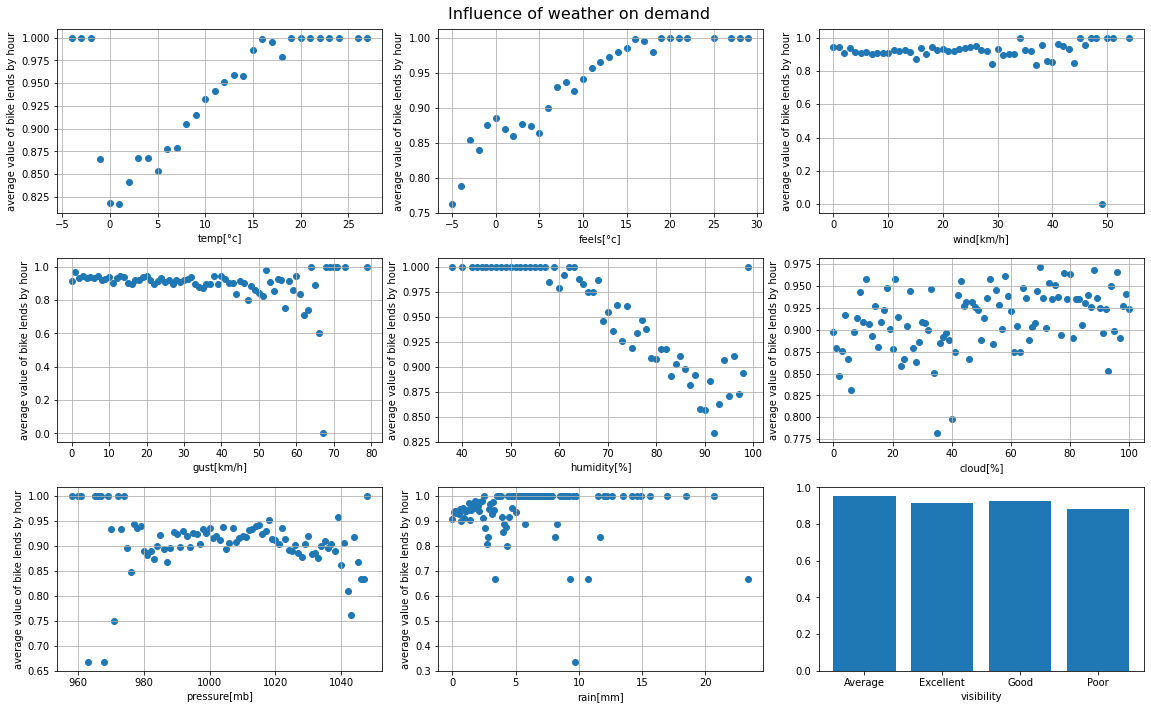

In [721]:
list = ['temp[°c]','feels[°c]','wind[km/h]','gust[km/h]','humidity[%]','cloud[%]','pressure[mb]','rain[mm]']
i = 0
j = 0

fig = plt.figure(figsize=(16,10))
fig.suptitle('Influence of weather on demand', fontsize=16)

for n in list:
    ax = plt.subplot2grid((3,3), (j,i), fig=fig)
    ax.scatter(df_by_column(n)[n], df_by_column(n)['duration'])
    ax.set_xlabel(n)
    ax.set_ylabel('average value of bike lends by hour')
    ax.grid()
    i += 1
    if i > 2:
        i = 0
        j += 1

df_vis = df.groupby('vis').agg({'duration': lambda x: x.mean() / 3,}).reset_index()
ax = plt.subplot2grid((3,3), (2,2), fig=fig)
ax.bar(df_vis['vis'], df_vis['duration'])
ax.set_xlabel('visibility')

plt.tight_layout()
plt.show()

From the charts shown above, the effect of weather on demand can be identified.

Temperature - As the temperature increases, so does demand. At higher temperatures (25 ° C and more) the demand is lower.

Wind - At wind speeds greater than 20 km / h, the demand for bicycles begins to decline. The chart also shows a higher value of the demand for bicycles at a wind speed of around 50 km / h. However, this may be related to the fact that we only have weather data at intervals of three hours and this distorts the results.

Gust - As the gust always lasts only a few seconds, it should have no effect on demand. However, a similar course can be seen from the chart as in the wind.

Humidity - The lower the humidity, the greater the demand for bikes.

Clouds - Clouds according to the chart do not affect demand

Pressure - The greatest demand for wheels is at a pressure of around 1020 mb. If the pressure increases or decreases, demand decreases.

Rain - This chart shows the declining demand as the value of rain increases. Since we only have weather data at three-hour intervals, this shows us higher demand for bicycles even in the rain. But that doesn't mean people rent bikes in the rain. For example, it may rain for only one hour in three hours, and the other two may be sunny, so the demand for bicycles may be greater.

Visibility - the greatest demand for bikes is in excellent visibility and the lowest in poor visibility, whichs can be expected. Demand with average and good visibility is no longer so expected. The charts show that people rent bikes more often with average visibility than with good visibility. This may again be due to limited weather data

From the charts shown above, it can be said that the weather affects the demand for bicycles.

# 9) Demand for bike lending by the days of week and  the months

I will use a heatmap to find out the demand for rent bikes by month and day of the week. First, I will select only the years 2019 and 2020 from the dataset 'edinburgh_bikes_df', as these are the only years when the service was been in operation all year.

In [722]:
df = edinburgh_bikes_df[['duration','date','year','month','day_of_week']]
df = df.query('(year > 2018 and year < 2021)').sort_values(['month','day_of_week'])
df

,duration,date,year,month,day_of_week
15091,6.150000,2019-01-07,2019,1,0
15092,15.283333,2019-01-07,2019,1,0
15093,3.250000,2019-01-07,2019,1,0
15094,28.166667,2019-01-07,2019,1,0
15095,2271.650000,2019-01-07,2019,1,0
...,...,...,...,...,...
373362,4.733333,2020-12-27,2020,12,6
373363,13.550000,2020-12-27,2020,12,6
373364,11.250000,2020-12-27,2020,12,6
373365,8.450000,2020-12-27,2020,12,6


I will group the data by month and day of the week and calculate the number of bikes rented. Then I convert the table to a pivot table from which a heatmap can be created. The months and days of the week were recorded numerically so that they could be sorted correctly, so I have to convert them to their names.

In [723]:
df = df[['month','day_of_week','duration']].groupby(['month', 'day_of_week'])['duration'].count().reset_index()

df_pivot = df.pivot(index='month', columns='day_of_week', values='duration')

df_pivot.rename(index={1:'January',
                       2:'February',
                       3:'March', 
                       4:'April',
                       5:'May',
                       6:'June',
                       7:'July',
                       8:'August',
                       9:'September',
                       10:'October',
                       11:'November',
                       12:'December'},
                inplace=True)

df_pivot.rename(columns={0:'Monday',
                         1:'Tuesday',
                         2:'Wendesday',
                         3:'Thruesday',
                         4:'Friday',
                         5:'Saturday',
                         6:'Sunday'},
                inplace=True)

df_pivot

day_of_week,Monday,Tuesday,Wendesday,Thruesday,Friday,Saturday,Sunday
month,,,,,,,
January,1911,2176,2388,2421,2488,1736,1678
February,1695,2027,2210,2336,2023,1841,1504
March,2661,2795,2548,2800,2684,2467,3104
April,3227,3044,3036,2368,2816,3756,4100
May,5601,5256,6540,5840,7295,7841,7435
June,5885,6128,5299,5803,4692,7300,6054
July,5491,6504,6038,6295,6731,6608,6305
August,6633,4199,5650,6908,6496,9756,7938
September,5224,5912,5334,5260,5379,6422,6429


The data is ready and it is possible to create a heatmap. From the heatmap it is legible in which months and days of the week the demand is greatest.

At first glance, the heatmap shows that the greatest demand for bicycles is in the months of May to September, when the best conditions for cycling are. During these months, bikes are rented more on weekends than on weekdays. While in the winter it is the other way around.

It can therefore be said that in the warmer months bicycles are used more for recreational travel, while in the winter months the demand for bicycle rental is used mainly for travel for work, school etc.

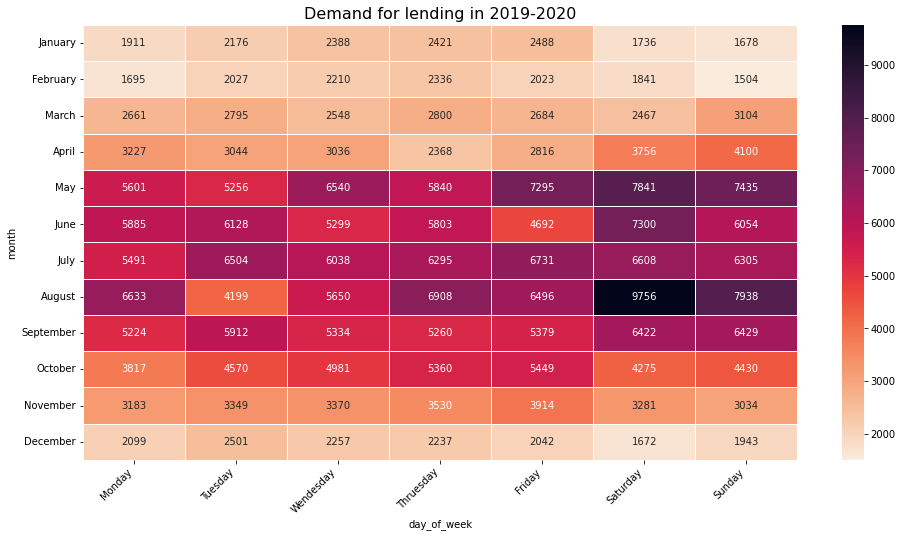

In [724]:
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(df_pivot, annot=True, ax=ax, fmt='d', cmap=sns.cm.rocket_r, linewidths=.5)
ax.set_title('Demand for lending in 2019-2020', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()